# Version 3 - Added Augmentation and Batch Norm

## 1. Imports

In [1]:
import os

import numpy as np
import cv2

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

from PIL import Image
from IPython.display import display

import torch
import torch.nn as nn

from torch.utils.data import DataLoader
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from torch.optim.lr_scheduler import StepLR
from torchsummary import summary
from tqdm import tqdm

## 2. Setup data

In [2]:
## set the path to train and test set
data_path = ## drive location
## for colab set the folders in colab root folder

#!unzip <zip file location>
data_path = '/content/chest_xray'

## 3. Explore data

In [3]:
class_name = ['NORMAL','PNEUMONIA']
def get_list_files(dirName):
    '''
    input - directory location
    output - list the files in the directory
    '''
    files_list = os.listdir(dirName)
    return files_list

files_list_normal_train = get_list_files(data_path+'\\train\\'+class_name[0])
files_list_pneu_train = get_list_files(data_path+'\\train\\'+class_name[1])

files_list_normal_test = get_list_files(data_path+'\\test\\'+class_name[0])
files_list_pneu_test = get_list_files(data_path+'\\test\\'+class_name[1])

In [4]:
print("Number of train samples in Normal category {}".format(len(files_list_normal_train)))
print("Number of train samples in Pneumonia category {}".format(len(files_list_pneu_train)))

print("Number of test samples in Normal category {}".format(len(files_list_normal_test)))
print("Number of test samples in Pneumonia category {}".format(len(files_list_pneu_test)))

Number of train samples in Normal category 1349
Number of train samples in Pneumonia category 3883
Number of test samples in Normal category 234
Number of test samples in Pneumonia category 390


(970, 1302)


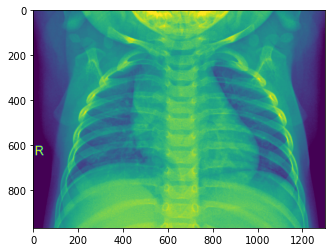

In [5]:
## get random file to check
img = data_path + '\\train\\NORMAL\\'+ files_list_normal_train[np.random.randint(0,len(files_list_normal_train))]
print(plt.imread(img).shape)
#display(Image.open(img,'r'),)

img = mpimg.imread(img)
imgplot = plt.imshow(img)
plt.show()

(1282, 1870)


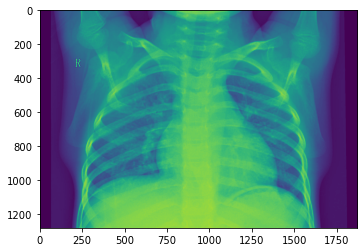

In [6]:
## get random file to check pneumona 
img = data_path + '\\train\\PNEUMONIA\\'+ files_list_pneu_train[np.random.randint(0,len(files_list_pneu_train))]
print(plt.imread(img).shape)
#display(Image.open(img,'r'),)

img = mpimg.imread(img)
imgplot = plt.imshow(img)
plt.show()

In [7]:
#path_to_image = <path>
plt.imread(path_to_image).shape

(2094, 2194)

In [8]:
cv2.imread(path_to_image).shape

(2094, 2194, 3)

In [9]:
train_transform = transforms.Compose([
    
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                          [0.229, 0.224, 0.225])
])

test_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                          [0.229, 0.224, 0.225])
])

In [10]:
## getting train and test data loader in place
train_data = datasets.ImageFolder(os.path.join(data_path, 'train'), transform= train_transform)
test_data = datasets.ImageFolder(os.path.join(data_path, 'test'), transform= test_transform)

train_loader = DataLoader(train_data,
                          batch_size= 4, shuffle= True, pin_memory= True)
test_loader = DataLoader(test_data, 
                         batch_size= 1, shuffle= False, pin_memory= True)

class_names = train_data.classes

print(class_names)
print(f'Number of train images: {len(train_data)}')
print(f'Number of test images: {len(test_data)}')

['NORMAL', 'PNEUMONIA']
Training images available: 5232
Testing  images available: 624


## 4. Define Model

In [14]:


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Input Block
        self.convblock1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=8, kernel_size=(3, 3), 
                      padding=0, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(8)
        ) 
        self.pool11 = nn.MaxPool2d(2, 2)

        # CONVOLUTION BLOCK 1
        self.convblock2 = nn.Sequential(
            nn.Conv2d(in_channels=8, out_channels=16, kernel_size=(3, 3),
                      padding=0, bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(16)
        ) 

        self.pool22 = nn.MaxPool2d(2, 2) 


        self.convblock3 = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=10, kernel_size=(1, 1), padding=0, bias=False),
            
            nn.ReLU(),
            nn.BatchNorm2d(10),
        ) 
        self.pool33 = nn.MaxPool2d(2, 2) 
        

        # CONVOLUTION BLOCK 2
        self.convblock4 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=(3, 3), padding=0, bias=False),
            nn.ReLU(),            
            nn.BatchNorm2d(10)
        )

        self.convblock5 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=32, kernel_size=(1, 1), padding=0, bias=False),
            
            nn.ReLU(),
            nn.BatchNorm2d(32),
           
        ) 


        self.convblock6 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=10, kernel_size=(1, 1), padding=0, bias=False),
            nn.ReLU(),            
            nn.BatchNorm2d(10),
            
        )

        self.convblock7 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=(3, 3), padding=0, bias=False),
            nn.ReLU(),            
            nn.BatchNorm2d(10)
         
        )

        self.convblock8 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=32, kernel_size=(1, 1), padding=0, bias=False),
            
            nn.ReLU(),
            nn.BatchNorm2d(32)
        )


        self.convblock9 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=10, kernel_size=(1, 1), padding=0, bias=False),
            nn.ReLU(),            
            nn.BatchNorm2d(10)
            
        ) 

        self.convblock10 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=14, kernel_size=(3, 3), padding=0, bias=False),
            nn.ReLU(),            
            nn.BatchNorm2d(14)
            
        ) 

        self.convblock11 = nn.Sequential(
            nn.Conv2d(in_channels=14, out_channels=16, kernel_size=(3, 3), padding=0, bias=False),
            nn.ReLU(),            
            nn.BatchNorm2d(16)
            
        ) 
        
        # OUTPUT BLOCK
        self.gap = nn.Sequential(
            nn.AvgPool2d(kernel_size=4)
        ) 

        self.convblockout = nn.Sequential(
              nn.Conv2d(in_channels=16, out_channels=2, kernel_size=(4, 4), padding=0, bias=False),

        ) 

    def forward(self, x):
        x = self.convblock1(x)
        x = self.pool11(x)
        x = self.convblock2(x)
        x = self.pool22(x)
        x = self.convblock3(x)
        x = self.pool33(x)
        x = self.convblock4(x)
        x = self.convblock5(x)
        x = self.convblock6(x)
        x = self.convblock7(x)
        x = self.convblock8(x)
        x = self.convblock9(x)
        x = self.convblock10(x)
        x = self.convblock11(x)
        x = self.gap(x)        
        x = self.convblockout(x)

        x = x.view(-1, 2)
        return F.log_softmax(x, dim=-1)


In [15]:

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print("Available processor {}".format(device))
model = Net().to(device)
summary(model, input_size=(3, 224, 224))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 8, 222, 222]             216
              ReLU-2          [-1, 8, 222, 222]               0
       BatchNorm2d-3          [-1, 8, 222, 222]              16
         MaxPool2d-4          [-1, 8, 111, 111]               0
            Conv2d-5         [-1, 16, 109, 109]           1,152
              ReLU-6         [-1, 16, 109, 109]               0
       BatchNorm2d-7         [-1, 16, 109, 109]              32
         MaxPool2d-8           [-1, 16, 54, 54]               0
            Conv2d-9           [-1, 10, 54, 54]             160
             ReLU-10           [-1, 10, 54, 54]               0
      BatchNorm2d-11           [-1, 10, 54, 54]              20
        MaxPool2d-12           [-1, 10, 27, 27]               0
           Conv2d-13           [-1, 10, 25, 25]             900
             ReLU-14           [-1

In [16]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

## Train and Test function

In [17]:


train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

def train(model, device, train_loader, optimizer, epoch):
    model.train()
    pbar = tqdm(train_loader)
    correct = 0
    processed = 0
    for batch_idx, (data, target) in enumerate(pbar):
        # get samples
        data, target = data.to(device), target.to(device)

        # Init
        optimizer.zero_grad()
        # In PyTorch, gradient is accumulated over backprop and even though thats used in RNN generally not used in CNN 
        # or specific requirements
        
        y_pred = model(data)

        # Calculate loss
        loss = F.nll_loss(y_pred, target)
        train_losses.append(loss)

        # Backpropagation
        loss.backward()
        optimizer.step()

        # Update pbar-tqdm

        pred = y_pred.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
        correct += pred.eq(target.view_as(pred)).sum().item()
        processed += len(data)

        pbar.set_description(desc= f'Loss={loss.item()} Batch_id={batch_idx} Accuracy={100*correct/processed:0.2f}')
        train_accuracies.append(100*correct/processed)

def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
            test_loss, correct, len(test_loader.dataset),
            100. * correct / len(test_loader.dataset)))

    test_accuracies.append(100. * correct / len(test_loader.dataset))


In [18]:


model =  Net().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = StepLR(optimizer, step_size=6, gamma=0.5)

EPOCHS = 15
for epoch in range(EPOCHS):
    print("EPOCH number:", epoch)
    train(model, device, train_loader, optimizer, epoch)
    scheduler.step()
    print('Current Learing Rate: ', optimizer.state_dict()["param_groups"][0]["lr"])
    #val_loss = 
    test(model, device, test_loader)

  0%|                                                                                         | 0/1308 [00:00<?, ?it/s]

EPOCH: 0


Loss=0.01646125316619873 Batch_id=1307 Accuracy=89.72: 100%|███████████████████████| 1308/1308 [01:47<00:00, 12.18it/s]


current Learing Rate:  0.01


Loss=0.18225467205047607 Batch_id=1 Accuracy=100.00:   0%|                            | 1/1308 [00:00<02:24,  9.03it/s]


Test set: Average loss: 0.5213, Accuracy: 517/624 (82.85%)

EPOCH: 1


Loss=0.061467207968235016 Batch_id=1307 Accuracy=93.65: 100%|██████████████████████| 1308/1308 [01:43<00:00, 12.63it/s]


current Learing Rate:  0.01


Loss=0.022758759558200836 Batch_id=2 Accuracy=100.00:   0%|                           | 2/1308 [00:00<01:25, 15.31it/s]


Test set: Average loss: 0.4199, Accuracy: 524/624 (83.97%)

EPOCH: 2


Loss=0.04426141455769539 Batch_id=1307 Accuracy=94.07: 100%|███████████████████████| 1308/1308 [01:42<00:00, 12.72it/s]


current Learing Rate:  0.01


Loss=0.06838954240083694 Batch_id=1 Accuracy=87.50:   0%|                             | 2/1308 [00:00<01:50, 11.87it/s]


Test set: Average loss: 0.5536, Accuracy: 500/624 (80.13%)

EPOCH: 3


Loss=0.000563441077247262 Batch_id=1307 Accuracy=94.51: 100%|██████████████████████| 1308/1308 [01:46<00:00, 12.25it/s]


current Learing Rate:  0.01


Loss=0.05237619951367378 Batch_id=2 Accuracy=100.00:   0%|                            | 2/1308 [00:00<01:36, 13.47it/s]


Test set: Average loss: 0.4567, Accuracy: 533/624 (85.42%)

EPOCH: 4


Loss=0.1614193171262741 Batch_id=1307 Accuracy=94.67: 100%|████████████████████████| 1308/1308 [01:51<00:00, 11.68it/s]


current Learing Rate:  0.01


Loss=0.0017850231379270554 Batch_id=1 Accuracy=100.00:   0%|                          | 2/1308 [00:00<01:41, 12.82it/s]


Test set: Average loss: 0.4523, Accuracy: 522/624 (83.65%)

EPOCH: 5


Loss=0.13939066231250763 Batch_id=1307 Accuracy=95.11: 100%|███████████████████████| 1308/1308 [01:43<00:00, 12.68it/s]


current Learing Rate:  0.005


Loss=0.002875127363950014 Batch_id=1 Accuracy=87.50:   0%|                            | 2/1308 [00:00<01:36, 13.55it/s]


Test set: Average loss: 0.4634, Accuracy: 535/624 (85.74%)

EPOCH: 6


Loss=0.0005817112978547812 Batch_id=1307 Accuracy=96.01: 100%|█████████████████████| 1308/1308 [01:42<00:00, 12.70it/s]


current Learing Rate:  0.005


Loss=0.00033558145514689386 Batch_id=1 Accuracy=100.00:   0%|                         | 2/1308 [00:00<01:21, 16.04it/s]


Test set: Average loss: 0.4929, Accuracy: 534/624 (85.58%)

EPOCH: 7


Loss=0.042432524263858795 Batch_id=1307 Accuracy=95.93: 100%|██████████████████████| 1308/1308 [01:43<00:00, 12.64it/s]


current Learing Rate:  0.005


Loss=0.0002023812266997993 Batch_id=1 Accuracy=100.00:   0%|                          | 2/1308 [00:00<01:50, 11.87it/s]


Test set: Average loss: 0.4656, Accuracy: 535/624 (85.74%)

EPOCH: 8


Loss=0.5616987943649292 Batch_id=1307 Accuracy=95.70: 100%|████████████████████████| 1308/1308 [01:43<00:00, 12.59it/s]


current Learing Rate:  0.005


Loss=0.0015009529888629913 Batch_id=1 Accuracy=100.00:   0%|                          | 2/1308 [00:00<01:36, 13.55it/s]


Test set: Average loss: 0.4451, Accuracy: 543/624 (87.02%)

EPOCH: 9


Loss=0.007375254295766354 Batch_id=1307 Accuracy=95.99: 100%|██████████████████████| 1308/1308 [01:43<00:00, 12.59it/s]


current Learing Rate:  0.005


Loss=0.006866895593702793 Batch_id=1 Accuracy=100.00:   0%|                           | 2/1308 [00:00<01:42, 12.77it/s]


Test set: Average loss: 0.3496, Accuracy: 560/624 (89.74%)

EPOCH: 10


Loss=0.013323081657290459 Batch_id=1307 Accuracy=96.54: 100%|██████████████████████| 1308/1308 [01:44<00:00, 12.50it/s]


current Learing Rate:  0.005


Loss=0.0012925849296152592 Batch_id=1 Accuracy=100.00:   0%|                          | 2/1308 [00:00<01:33, 14.02it/s]


Test set: Average loss: 0.3801, Accuracy: 547/624 (87.66%)

EPOCH: 11


Loss=0.005443839356303215 Batch_id=1307 Accuracy=96.54: 100%|██████████████████████| 1308/1308 [01:44<00:00, 12.52it/s]


current Learing Rate:  0.0025


Loss=0.026154158636927605 Batch_id=1 Accuracy=100.00:   0%|                           | 1/1308 [00:00<02:23,  9.12it/s]


Test set: Average loss: 0.4748, Accuracy: 533/624 (85.42%)

EPOCH: 12


Loss=0.06974062323570251 Batch_id=1307 Accuracy=96.44: 100%|███████████████████████| 1308/1308 [01:45<00:00, 12.41it/s]


current Learing Rate:  0.0025


Loss=0.01682826690375805 Batch_id=1 Accuracy=100.00:   0%|                                    | 0/1308 [00:00<?, ?it/s]


Test set: Average loss: 0.6099, Accuracy: 517/624 (82.85%)

EPOCH: 13


Loss=0.05808936804533005 Batch_id=1307 Accuracy=96.73: 100%|███████████████████████| 1308/1308 [01:45<00:00, 12.45it/s]


current Learing Rate:  0.0025


Loss=0.001747732050716877 Batch_id=0 Accuracy=100.00:   0%|                                   | 0/1308 [00:00<?, ?it/s]


Test set: Average loss: 0.4938, Accuracy: 540/624 (86.54%)

EPOCH: 14


Loss=0.0006196913891471922 Batch_id=1307 Accuracy=96.83: 100%|█████████████████████| 1308/1308 [01:47<00:00, 12.17it/s]


current Learing Rate:  0.0025

Test set: Average loss: 0.5214, Accuracy: 529/624 (84.78%)



Text(0.5, 1.0, 'Test Accuracy')

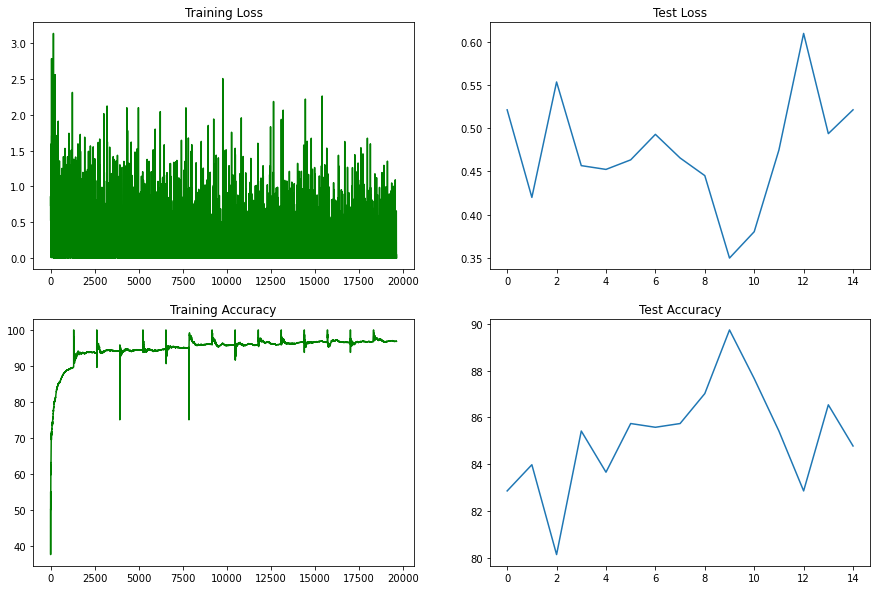

In [19]:

torch.cuda.synchronize()
train_losses1 = [float(i.cpu().detach().numpy()) for i in train_losses]
train_acc1 = [i for i in train_accuracies]
test_losses1 = [i for i in test_losses]
test_acc1 = [i for i in test_accuracies]

fig, axs = plt.subplots(2,2,figsize=(16,10))
axs[0, 0].plot(train_losses1,color='green')
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc1,color='green')
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses1)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc1)
axs[1, 1].set_title("Test Accuracy")